In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words = open('names.txt', 'r').read().splitlines()

In [4]:
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [5]:
len(words)

32033

In [6]:
chars = sorted(list(set(''.join(words))))
stoi = {ch: i+1 for i, ch in enumerate(chars)}
stoi['.'] = 0
itos = {i: ch for ch, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [7]:
block_size = 3
x, y = [], []
for w in words:
    #print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        x.append(context)
        y.append(ix)
        #print(''.join ([itos[i] for i in context]), '-->', itos[ix])
        context = context[1:] + [ix]
        
x = torch.tensor(x)
y = torch.tensor(y)

In [8]:
def buildDataset(words):
    block_size = 3
    x, y = [], []
    for w in words:
        #print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            x.append(context)
            y.append(ix)
            #print(''.join ([itos[i] for i in context]), '-->', itos[ix])
            context = context[1:] + [ix]
            
    x = torch.tensor(x)
    y = torch.tensor(y)
    print(x.shape, y.shape)
    return x, y
import random
random.seed(42)
random.shuffle(words)
n1 = int (len(words)*.8)    
n2 = int (len(words)*.9)    
x_train, y_train = buildDataset(words[:n1])
x_val, y_val = buildDataset(words[n1:n2])
x_test, y_test = buildDataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [9]:
x_train.shape, y_train.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [10]:
C = torch.randn(27,10)
C

tensor([[-4.6859e-01, -1.6725e+00, -2.0631e-01,  8.8021e-01, -6.5871e-01,
          1.2206e+00, -9.5094e-01, -2.7946e-01, -7.9360e-01,  7.2353e-01],
        [-2.3750e-01,  1.1971e+00, -2.4733e-01,  1.3999e+00, -5.2490e-01,
          9.7367e-01,  1.0314e+00,  7.5817e-01, -4.1224e-01,  1.5114e-01],
        [-1.1023e+00,  3.6111e-01,  5.9283e-01, -1.3041e-01, -4.2136e-01,
          7.9122e-01,  1.3297e+00, -7.6049e-02,  9.5189e-01,  7.7337e-01],
        [-1.1112e+00, -3.9367e-01, -1.4055e+00,  1.2108e-01, -3.7363e-01,
          2.8200e-01, -2.8794e-01,  1.0377e+00,  9.6221e-01,  5.5914e-01],
        [ 9.7888e-01, -5.3051e-01,  3.4911e-01,  1.6914e+00,  7.2478e-01,
         -1.2905e+00,  4.4273e-01,  1.5042e+00, -2.0737e-01, -2.4491e-04],
        [-3.3851e-01,  1.3120e+00,  4.7923e-01, -7.3959e-01,  5.8930e-02,
          2.9484e-01, -6.8157e-01, -4.0285e-01,  1.6118e+00,  4.7010e-01],
        [ 5.6661e-01, -4.7668e-01, -7.0419e-01, -8.1663e-01,  3.4745e-01,
          1.4369e+00,  7.5175e-0

In [11]:
C[[7, 5, 6, 7]]

tensor([[-0.3557, -0.0951,  0.5992,  0.9273,  0.3048, -0.7070,  0.3468,  1.3406,
          0.2746, -2.2907],
        [-0.3385,  1.3120,  0.4792, -0.7396,  0.0589,  0.2948, -0.6816, -0.4028,
          1.6118,  0.4701],
        [ 0.5666, -0.4767, -0.7042, -0.8166,  0.3475,  1.4369,  0.7518,  0.8852,
         -0.5316,  2.1641],
        [-0.3557, -0.0951,  0.5992,  0.9273,  0.3048, -0.7070,  0.3468,  1.3406,
          0.2746, -2.2907]])

In [12]:
C[x]

tensor([[[-0.4686, -1.6725, -0.2063,  ..., -0.2795, -0.7936,  0.7235],
         [-0.4686, -1.6725, -0.2063,  ..., -0.2795, -0.7936,  0.7235],
         [-0.4686, -1.6725, -0.2063,  ..., -0.2795, -0.7936,  0.7235]],

        [[-0.4686, -1.6725, -0.2063,  ..., -0.2795, -0.7936,  0.7235],
         [-0.4686, -1.6725, -0.2063,  ..., -0.2795, -0.7936,  0.7235],
         [-0.3385,  1.3120,  0.4792,  ..., -0.4028,  1.6118,  0.4701]],

        [[-0.4686, -1.6725, -0.2063,  ..., -0.2795, -0.7936,  0.7235],
         [-0.3385,  1.3120,  0.4792,  ..., -0.4028,  1.6118,  0.4701],
         [ 0.3730,  1.4450, -1.6234,  ..., -0.2418, -0.0879,  0.6350]],

        ...,

        [[-1.2397, -1.0136, -0.4857,  ..., -0.9861,  1.2605, -1.0064],
         [-1.2397, -1.0136, -0.4857,  ..., -0.9861,  1.2605, -1.0064],
         [ 1.5731, -0.0779, -0.1996,  ...,  0.3413, -0.0312,  1.8473]],

        [[-1.2397, -1.0136, -0.4857,  ..., -0.9861,  1.2605, -1.0064],
         [ 1.5731, -0.0779, -0.1996,  ...,  0.3413, -0.

In [13]:
emb = C[x_train]
emb.shape

torch.Size([182625, 3, 10])

In [14]:
W1 = torch.randn(30, 200)
B1 = torch.randn(200)

In [15]:
emb[:, 0, :].shape, emb[:, 1, :].shape, emb[:, 2, :].shape

(torch.Size([182625, 10]), torch.Size([182625, 10]), torch.Size([182625, 10]))

In [16]:
# torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim=1).shape

In [17]:
# torch.cat(emb.unbind(dim=1), dim=1).shape

In [18]:
emb.view(-1, 30) == torch.cat(emb.unbind(dim=1), dim=1)

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [19]:
h = torch.tanh(emb.view(-1, 30) @ W1 + B1)

In [20]:
W2 = torch.randn(200, 27)
B2 = torch.randn(27)

In [21]:
logits = h @ W2 + B2

In [22]:
counts = logits.exp()

In [23]:
prob = counts / counts.sum(dim=1, keepdim=True)

In [24]:
prob.shape

torch.Size([182625, 27])

In [25]:
parameters = [C, W1, B1, W2, B2]

In [26]:
loss = F.cross_entropy(logits, y_train)
loss

tensor(27.7365)

In [27]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre
for p in parameters:
    if p.grad is not None:
        p.grad = p.grad.detach()

In [28]:
# Ensure requires_grad is set to True for all parameters
for p in parameters:
    p.requires_grad = True
lri, lossi,stepi =  [], [], []

for i in range(50000):
    # Constructing a mini-batch
    ix = torch.randint(0, len(x_train), (32,))
    emb = C[x_train[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + B1)
    logits = h @ W2 + B2
    loss = F.cross_entropy(logits, y_train[ix])
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = .1
    for p in parameters:
        p.data += -lr * p.grad
    stepi.append(i)
    #lri.append(lre[i])
    lossi.append(loss.log10().item())

print(loss.item())


2.31160569190979


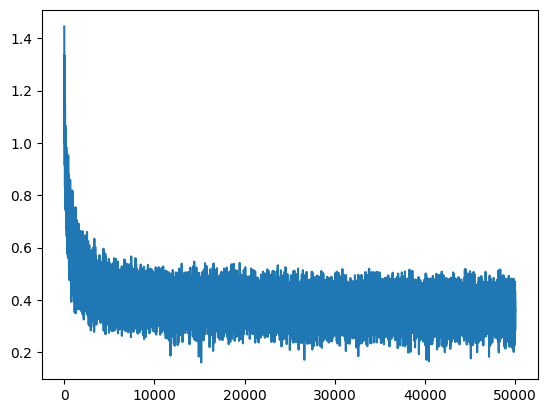

In [29]:
plt.plot(stepi, lossi)

In [30]:
emb = C[x_val]
h = torch.tanh(emb.view(-1, 30) @ W1 + B1)
logits = h @ W2 + B2
loss = F.cross_entropy(logits, y_val)
loss.item()

2.325826406478882

In [31]:
torch.randint(0, x.shape[0], (32,))

tensor([215382, 153948, 181933,   1489, 177700, 169919, 161931,   9903, 206303,
         76828,    527, 213337,  66528,  14067, 152793, 132116,  73319, 192334,
        100842,  69189, 200991, 106147,   4546, 222663,  67390, 135203, 141521,
         90781, 112042, 210892, 116791,  50771])

In [32]:
# spliting the data into training, validation, and test sets
#                        0.8       0.1             0.1

In [33]:
buildDataset(words)

torch.Size([228146, 3]) torch.Size([228146])


(tensor([[ 0,  0,  0],
         [ 0,  0, 25],
         [ 0, 25, 21],
         ...,
         [15, 22,  1],
         [22,  1, 14],
         [ 1, 14,  9]]),
 tensor([25, 21,  8,  ..., 14,  9,  0]))

In [34]:
for _ in range(10):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor(context)]
        h = torch.tanh(emb.view(1,-1) @ W1 + B1)
        logits = h @ W2 + B2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, 1).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
        
    print(''.join([itos[i] for i in out]))

del.
miie.
cile.
jail.
liazonniah.
warlah.
mickaora.
alianna.
lairee.
jayvella.
